In [13]:
import os
import sys
import cv2
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)

In [14]:
def get_eigen_vector(image):
    image = np.argwhere(image == 0)
    pca = PCA(n_components=2)
    pca.fit(image)
    eigenvectors = pca.components_
    return eigenvectors[0]

def get_rotation_angle(e1, e2):
    cosine = np.dot(e1, e2)
    angle = np.arccos(cosine)
    angle_degrees = np.degrees(angle)
    if np.cross(e1, e2) < 0:
        return -1*angle_degrees
    return angle_degrees

- Import the template and all other shapes in the form of matrices using cv2.
- Calculate the first principal component for template and all the shapes using PCA.
- We consider first principal component as it accounts for maximum variance in the data.
- Then, find the angle between the first principal component of template and each shape.
- Use cross product to find the direction of rotation in order to align the shapes.
- The rotation is achieved using the cv2.getRotationMatrix2D function from opencv.
- The shapes are then aligned using the cv2.warpAffine function from opencv and displayed.

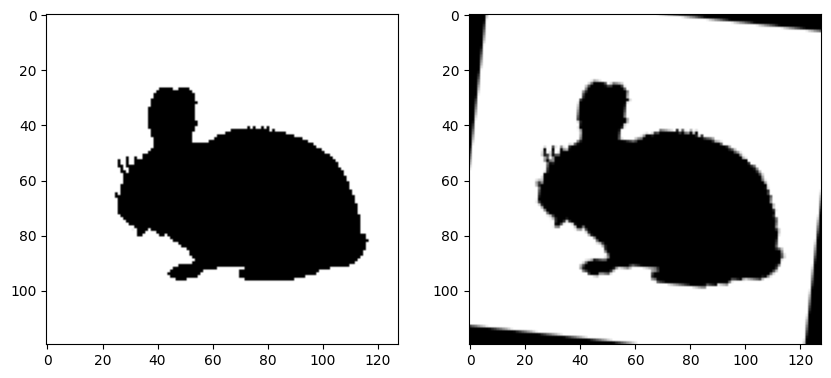

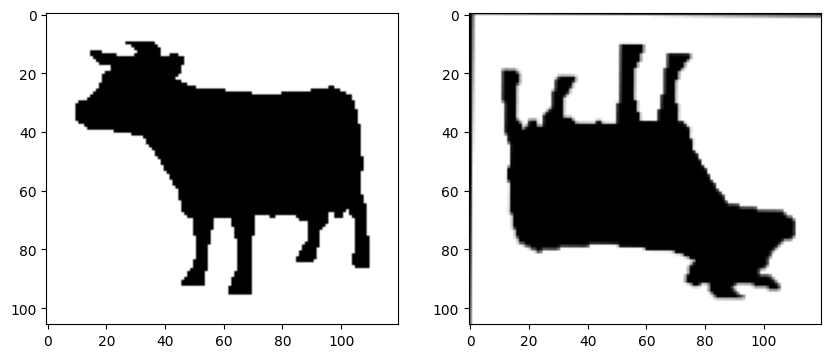

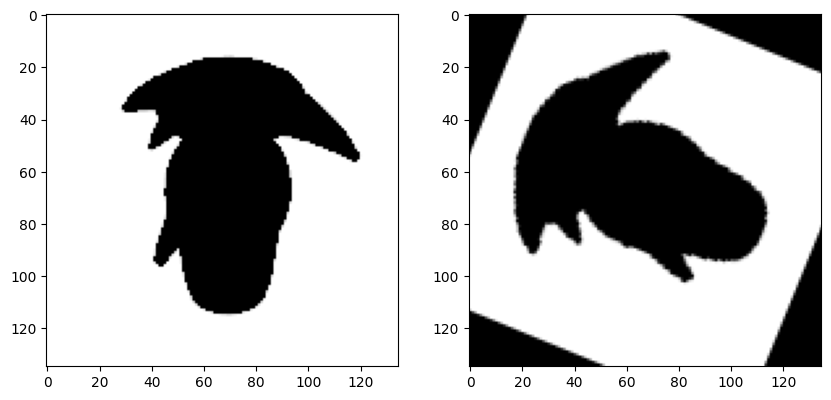

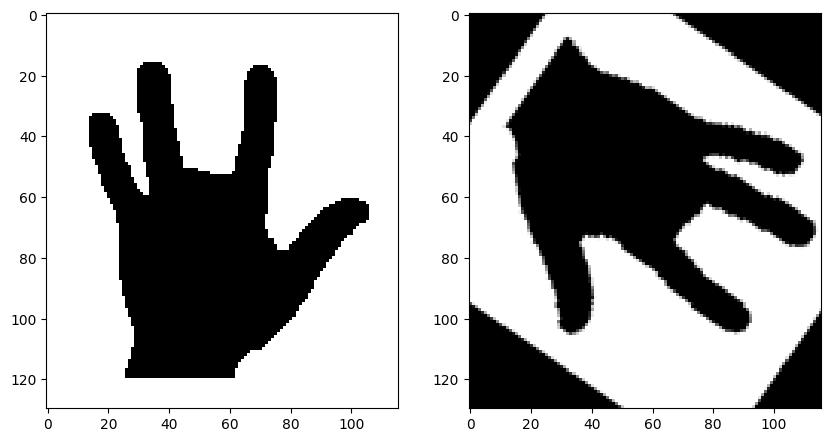

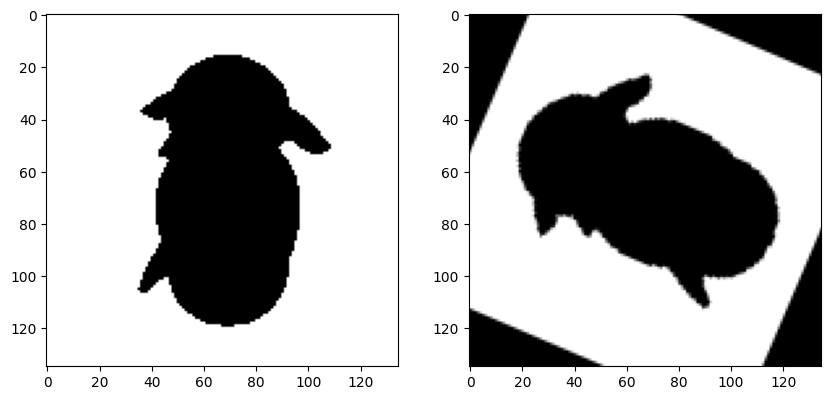

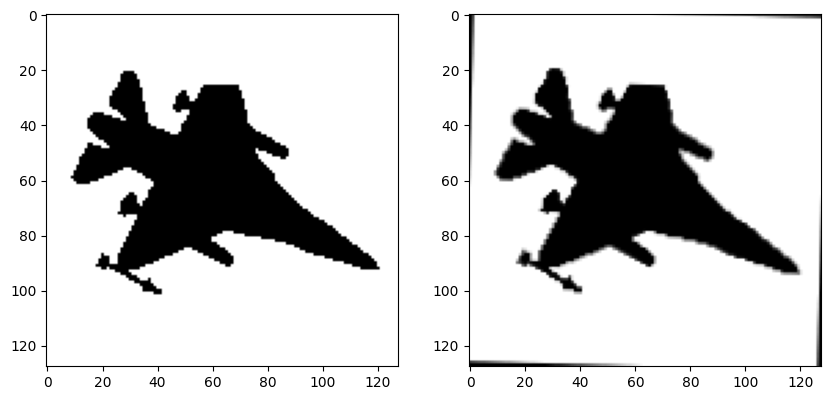

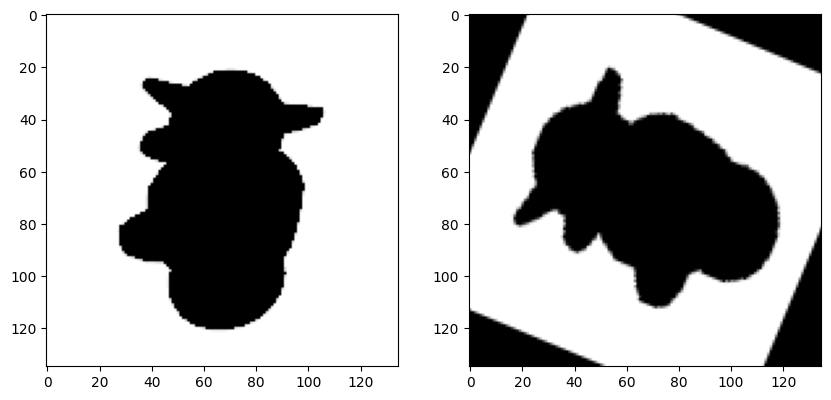

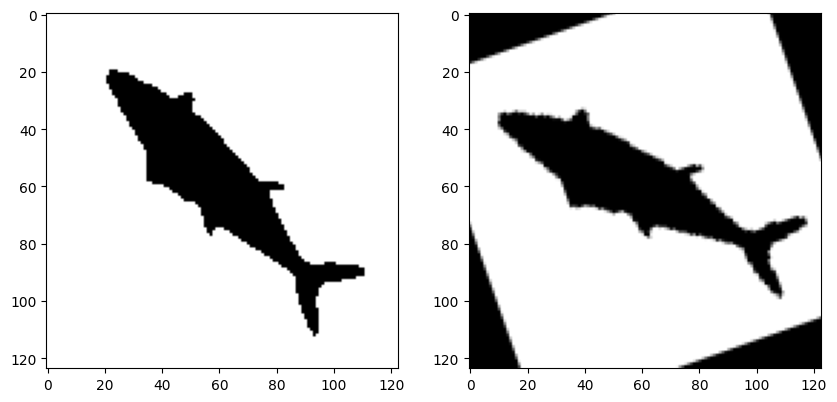

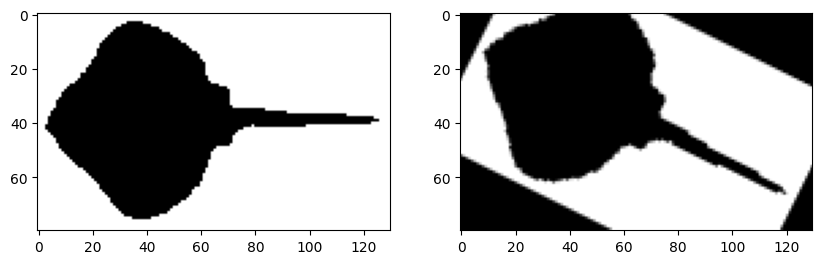

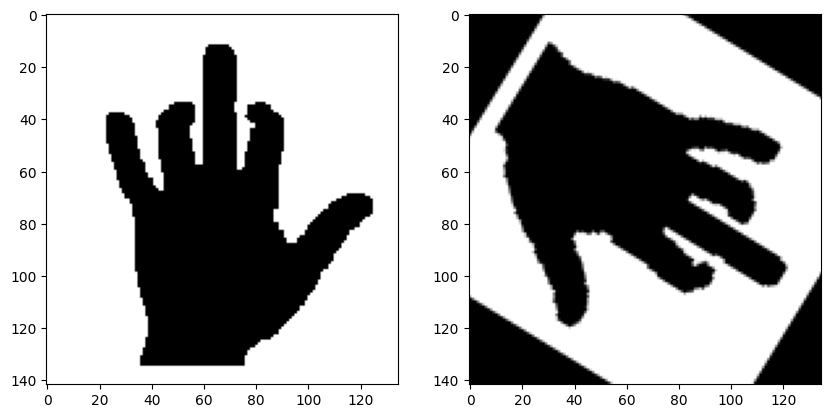

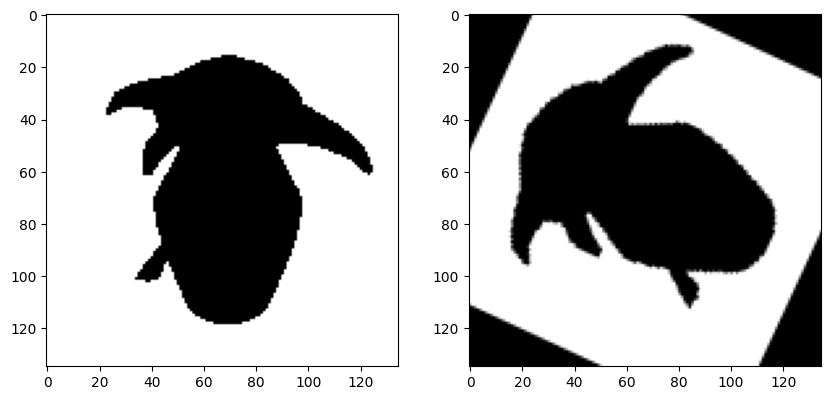

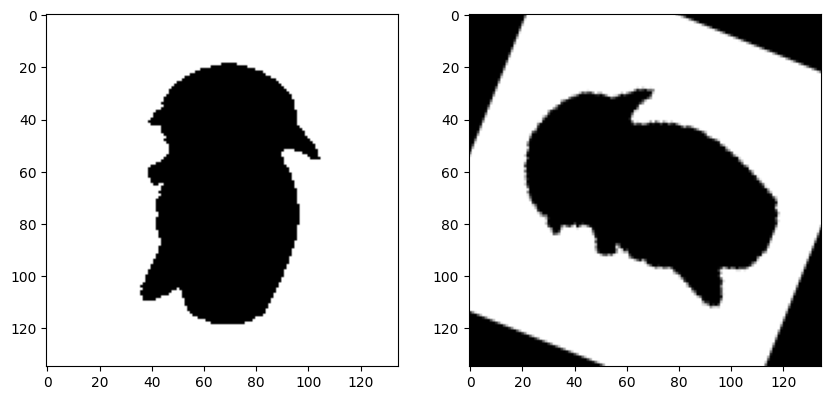

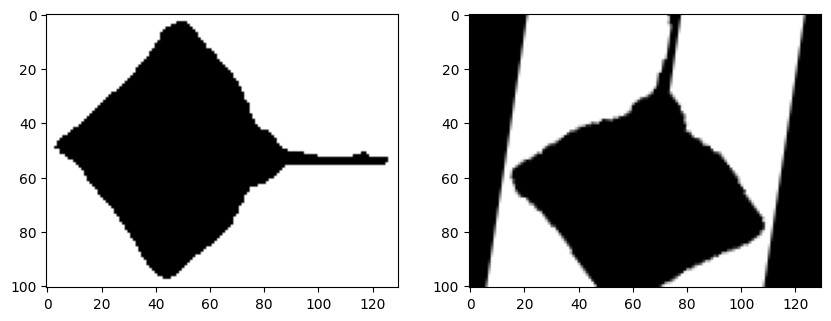

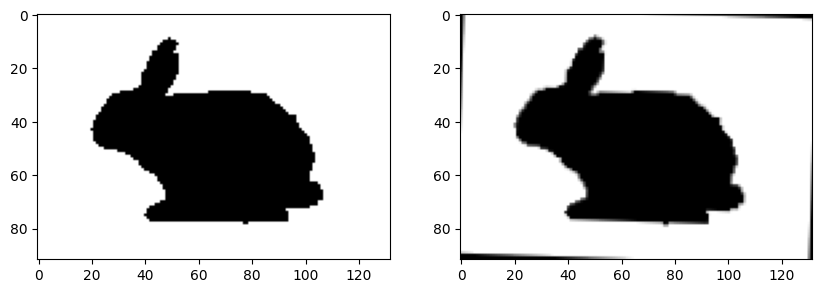

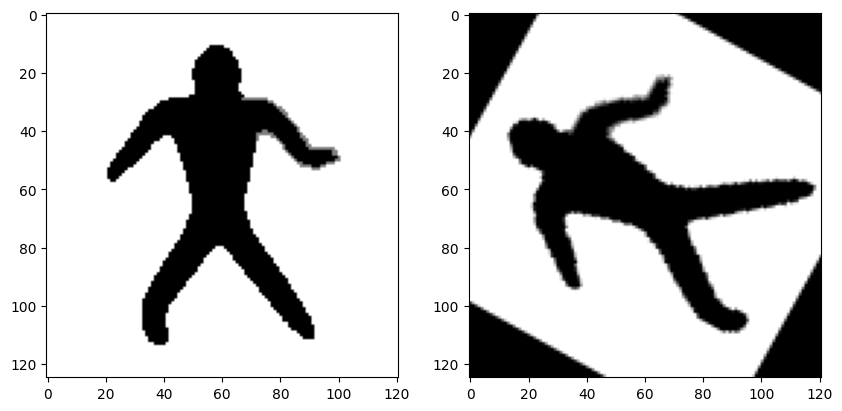

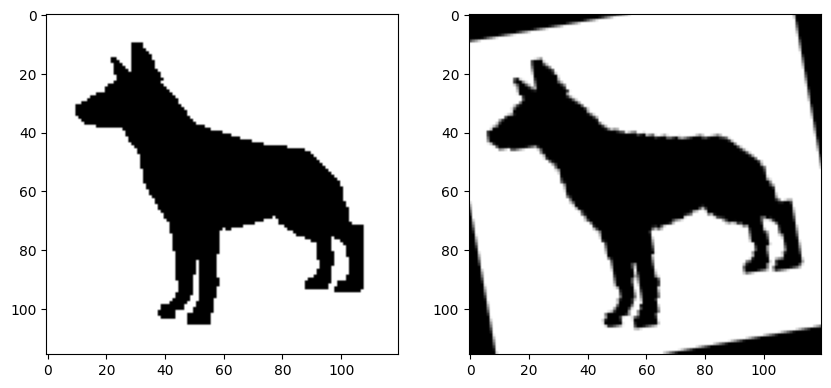

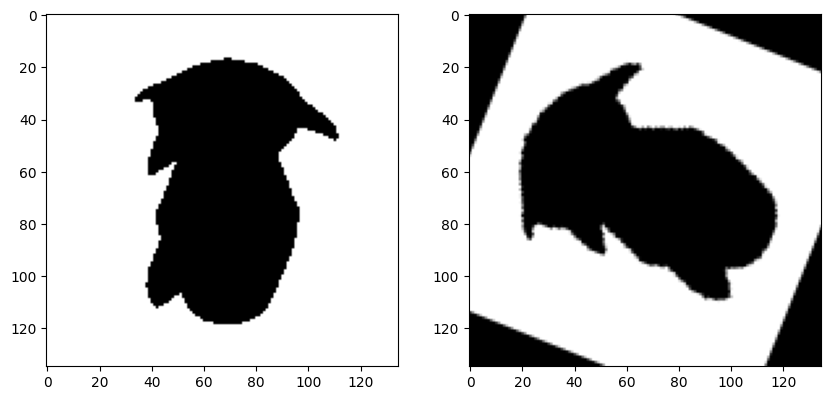

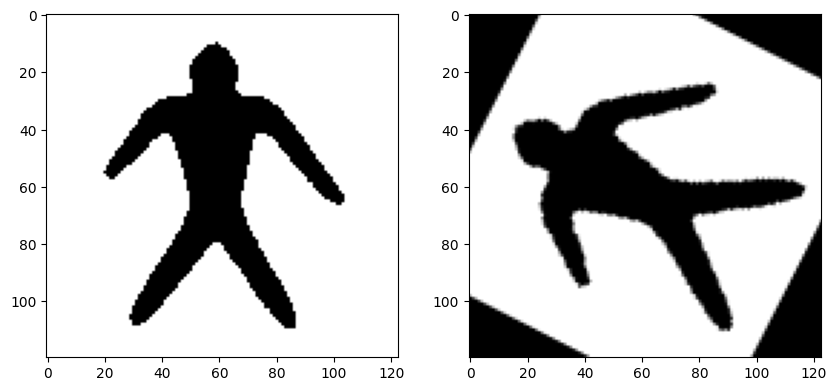

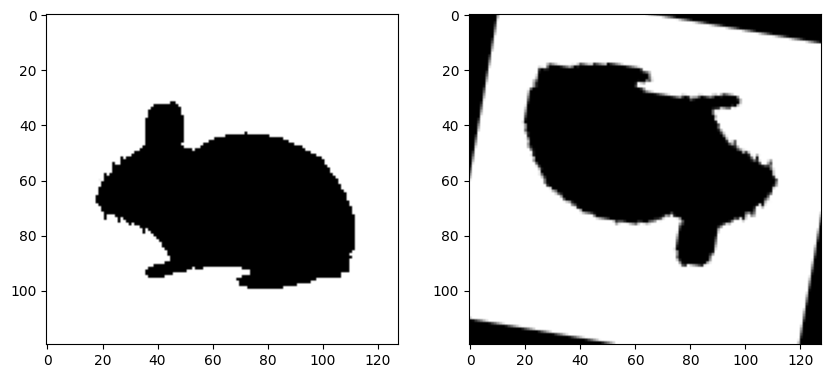

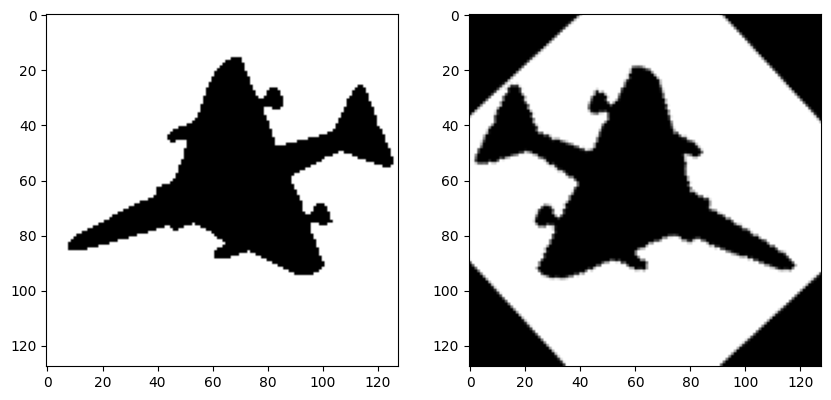

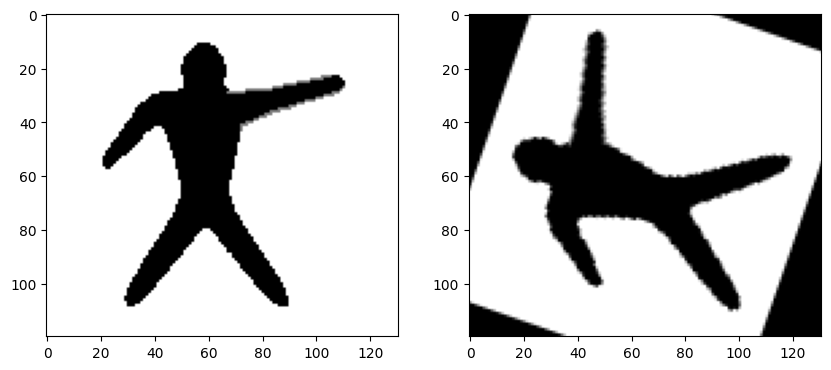

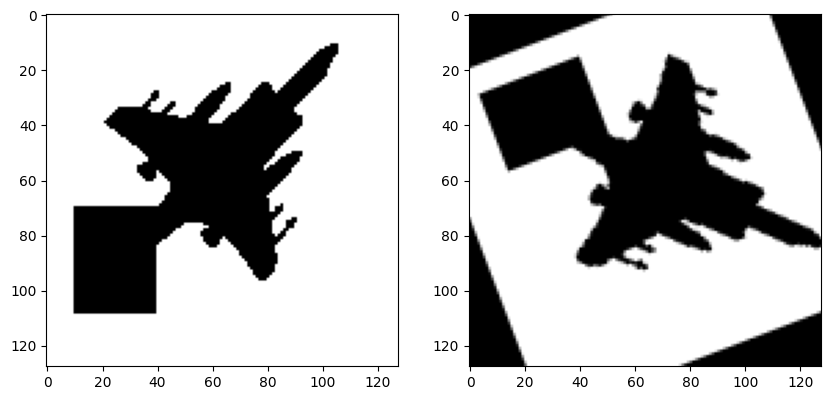

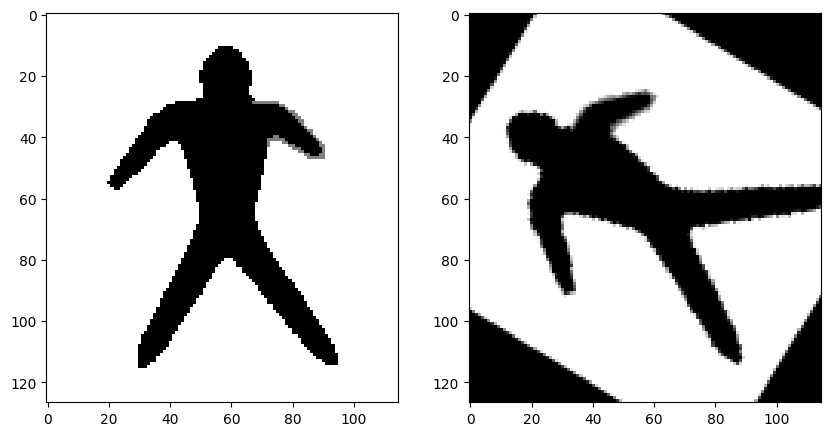

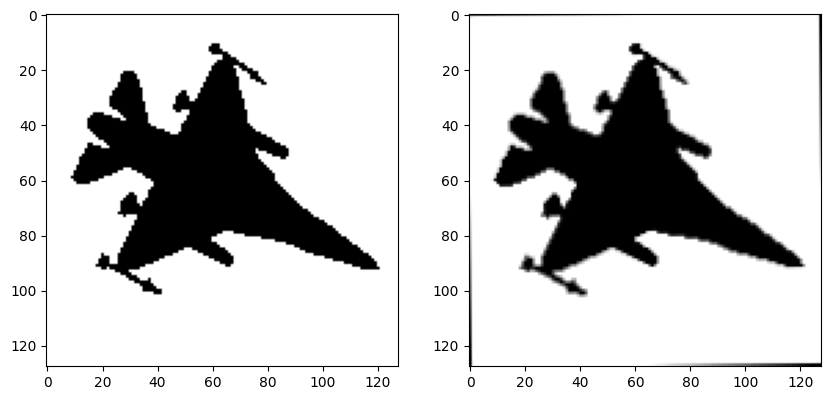

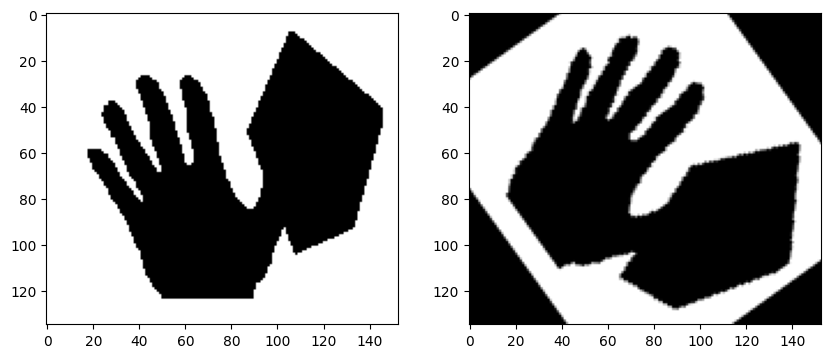

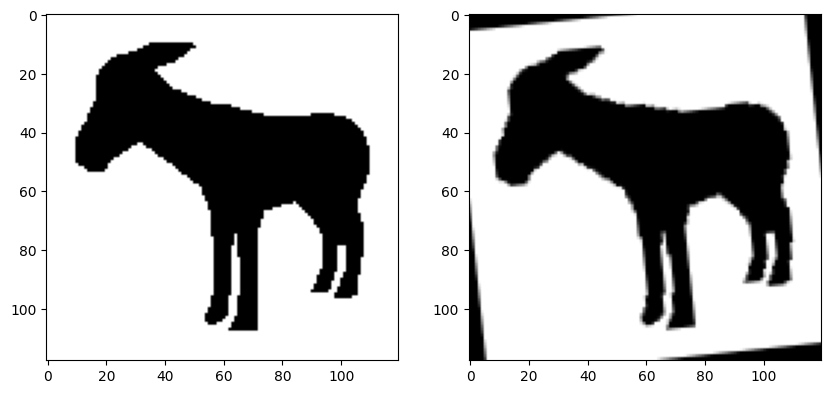

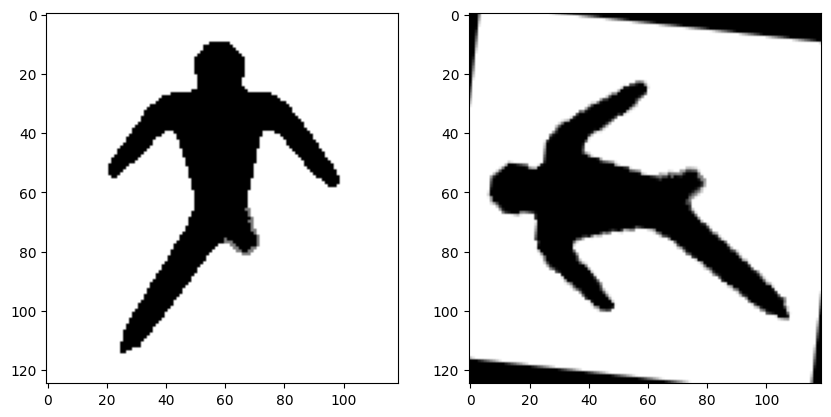

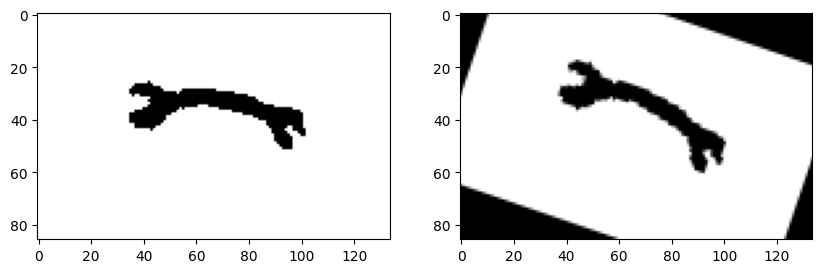

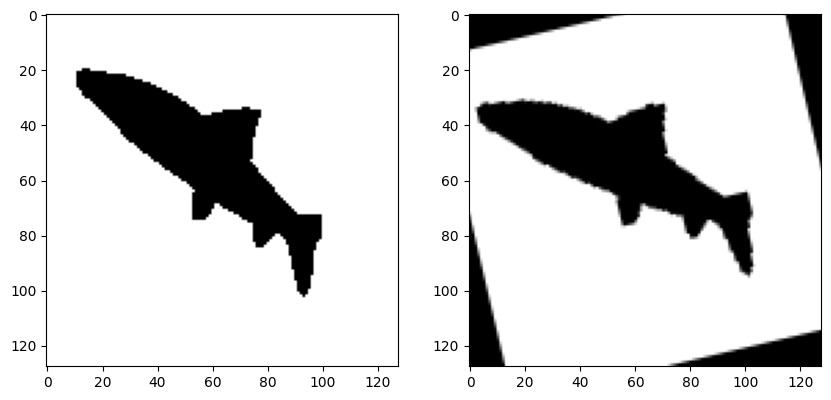

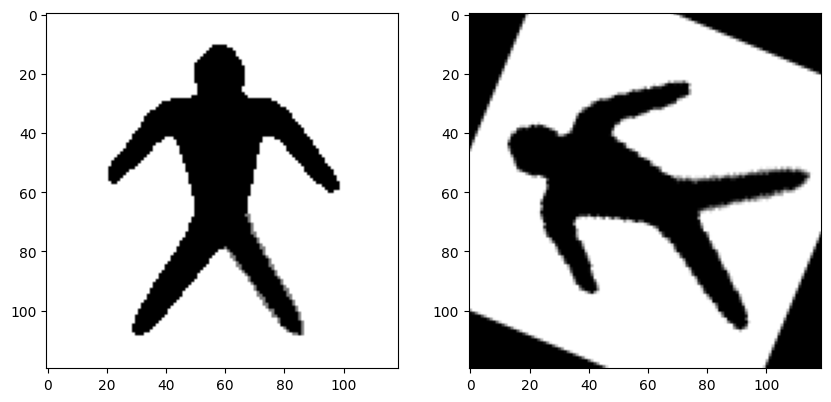

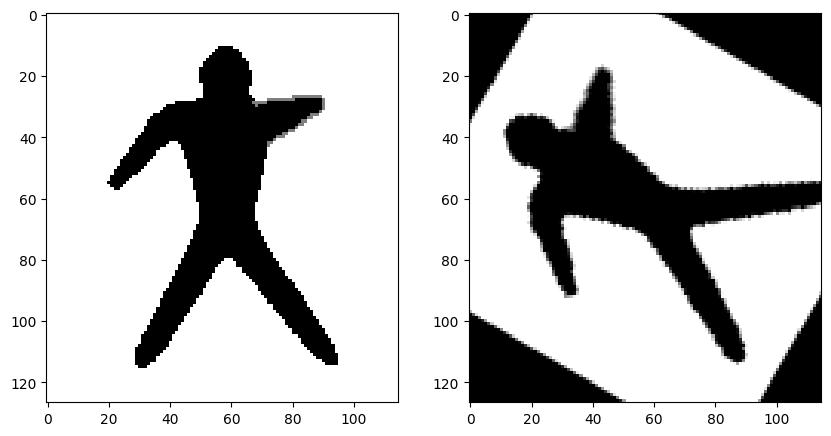

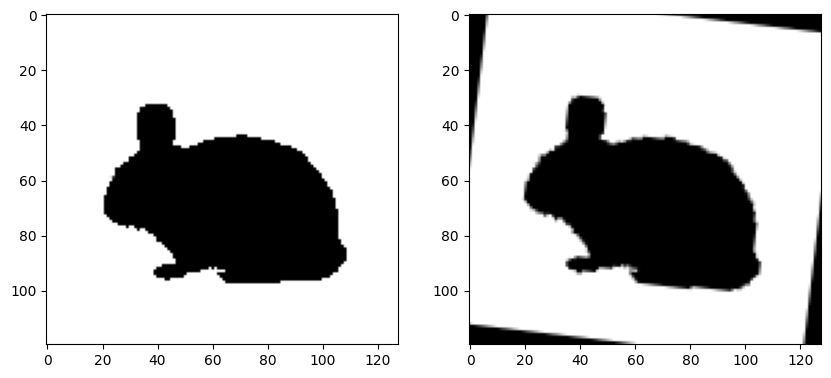

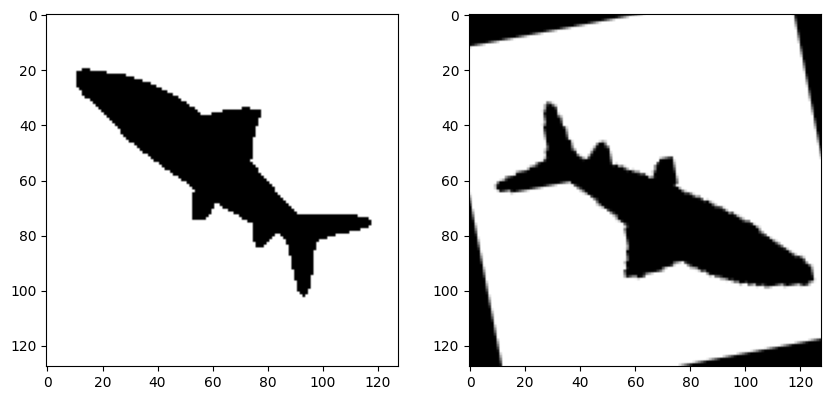

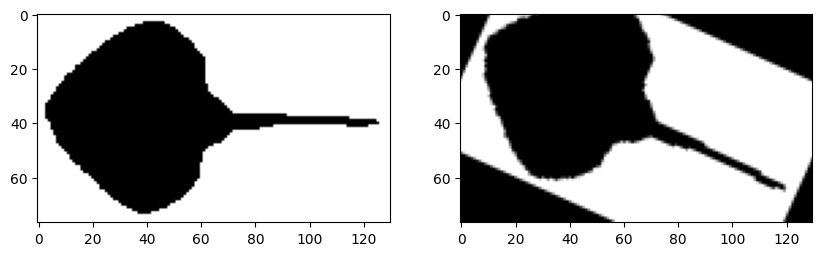

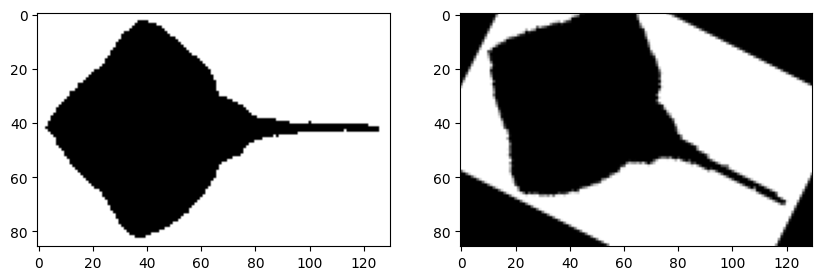

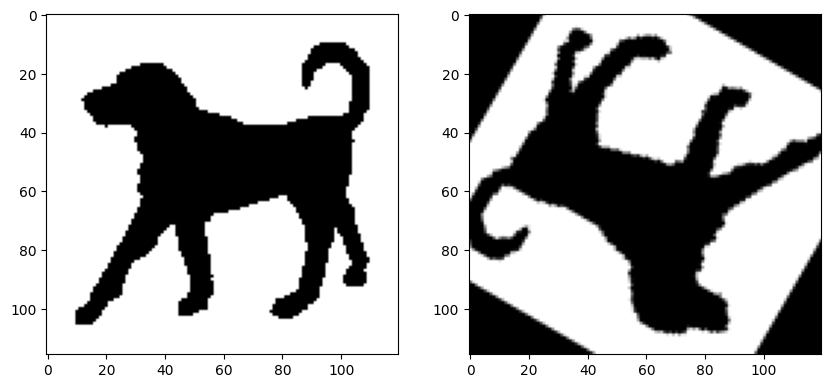

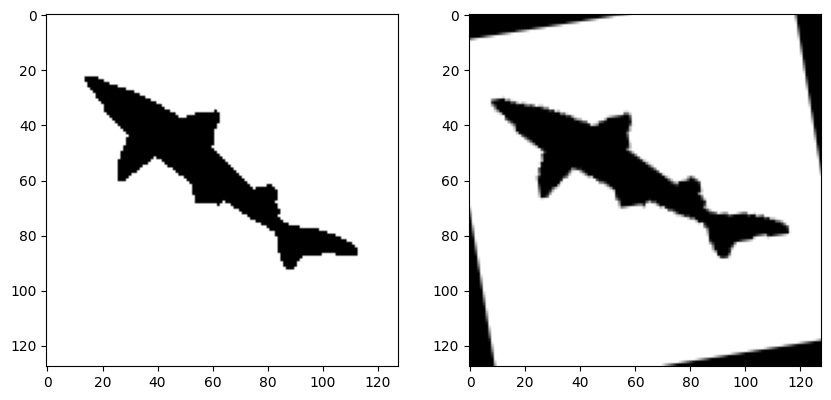

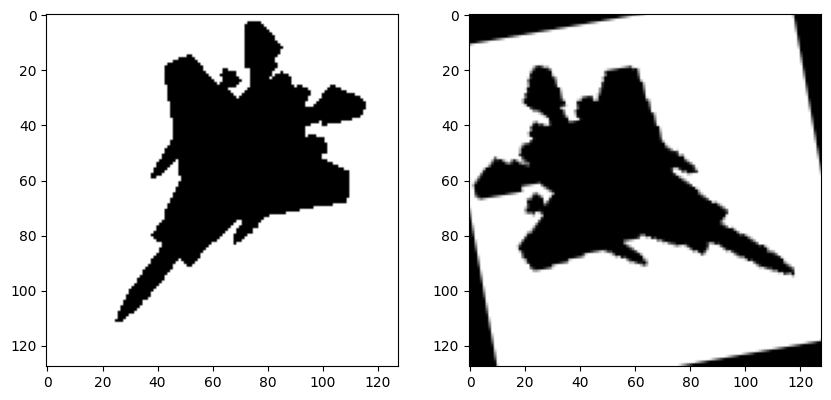

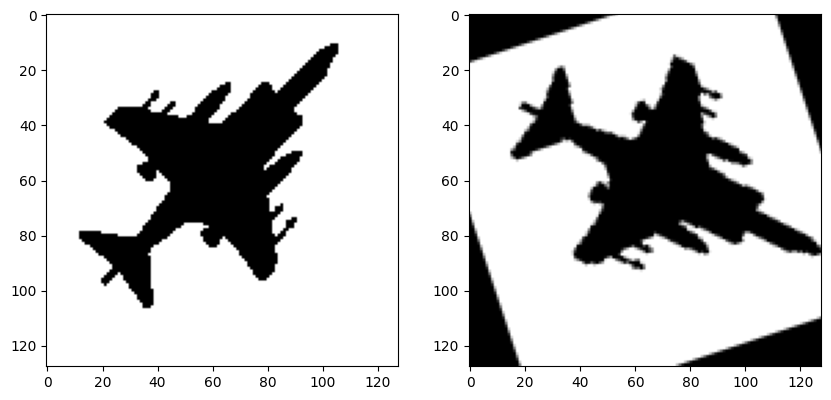

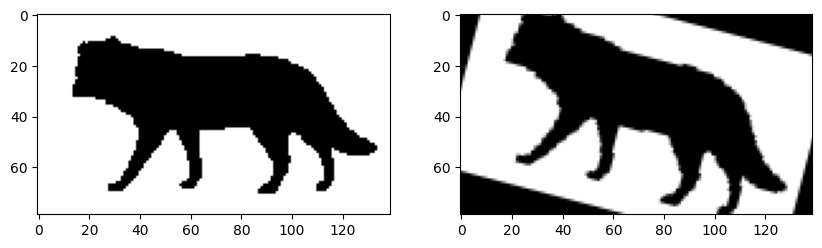

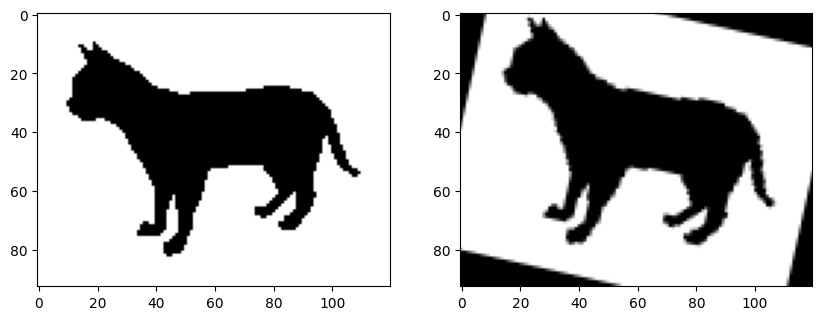

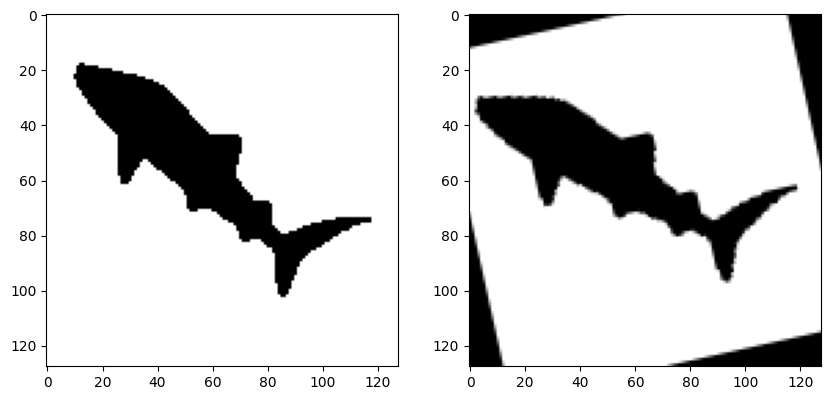

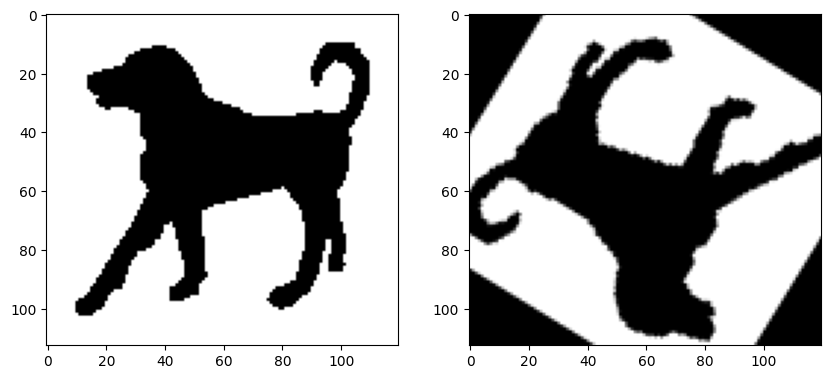

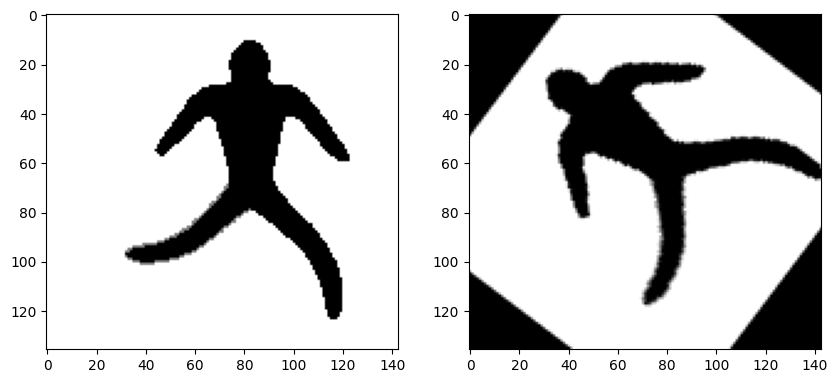

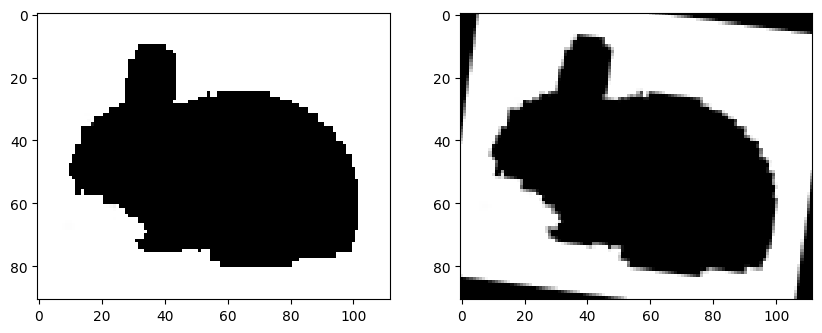

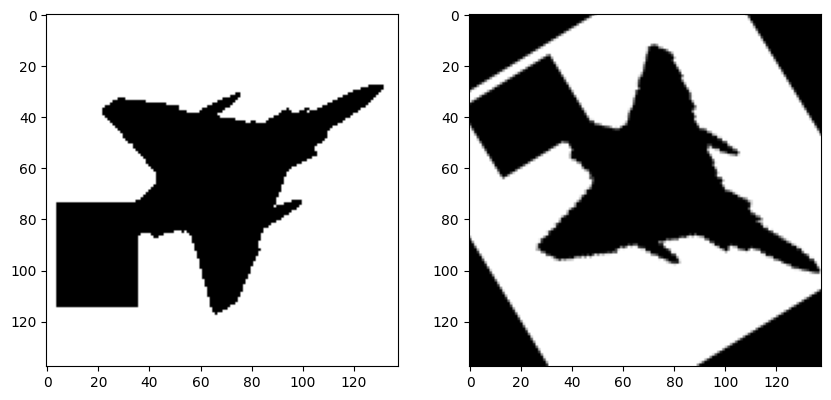

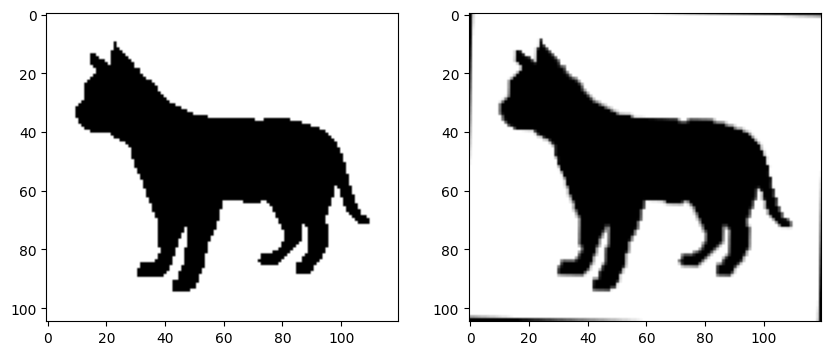

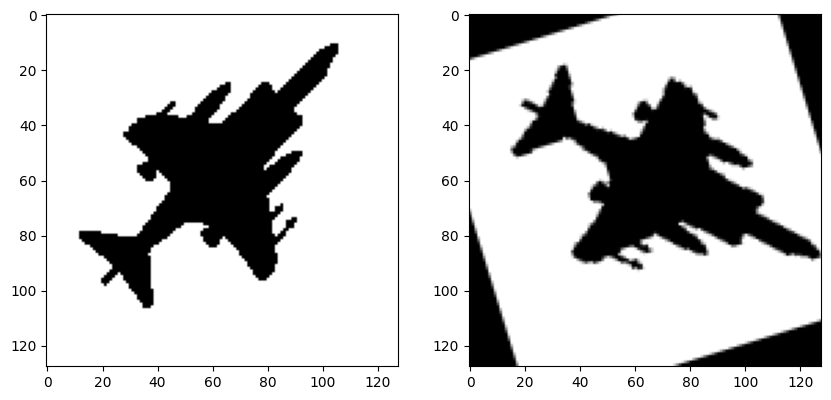

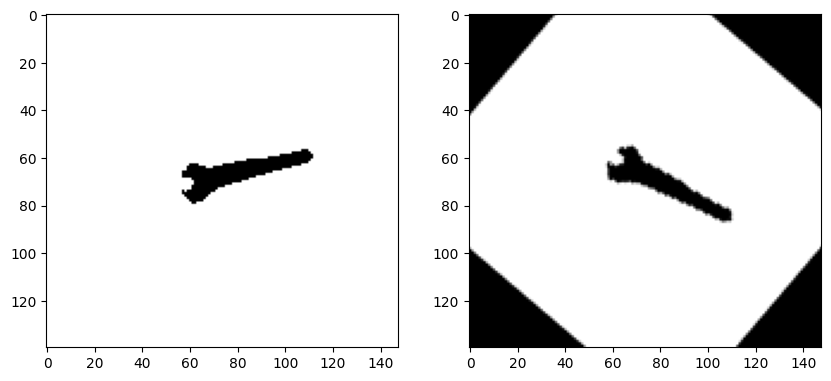

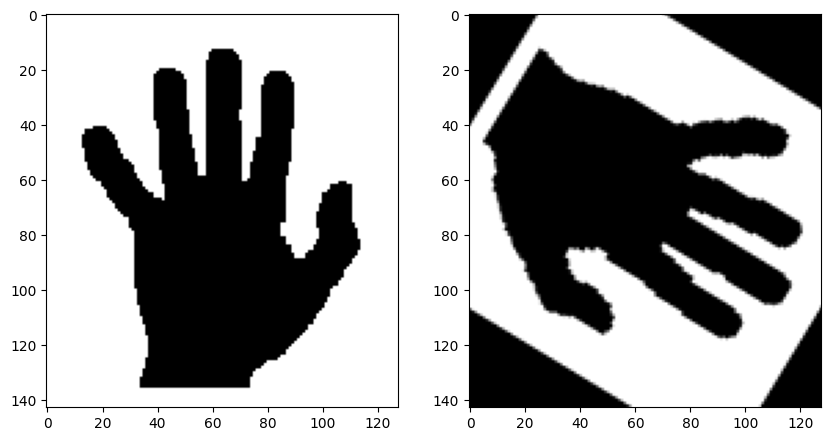

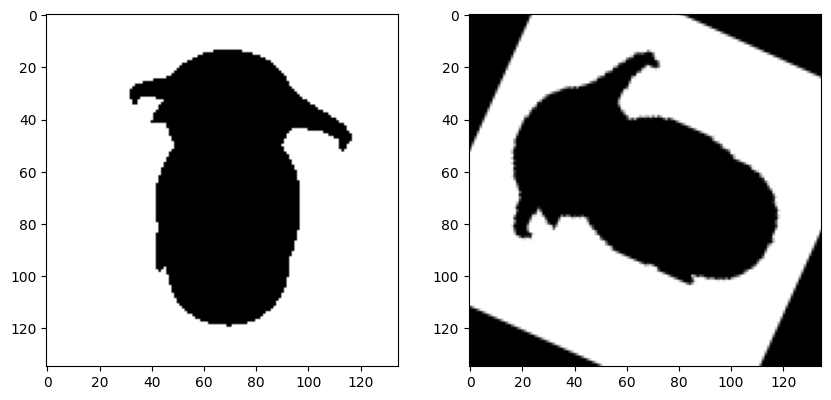

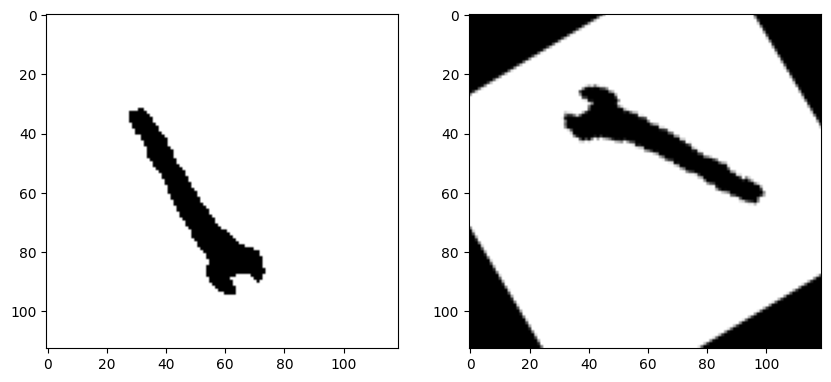

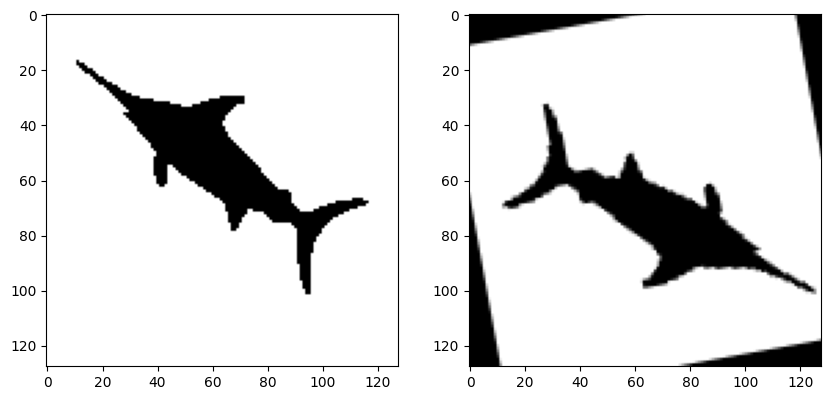

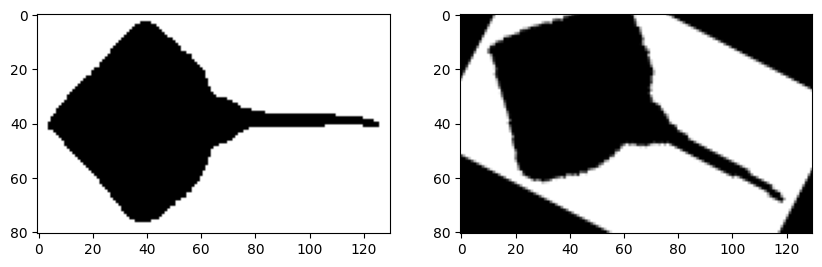

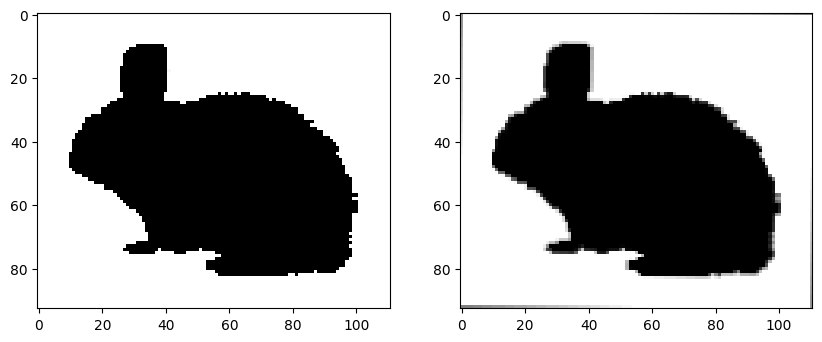

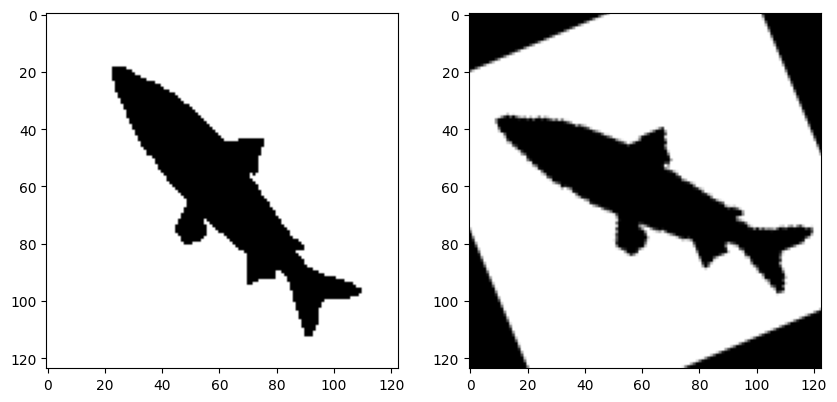

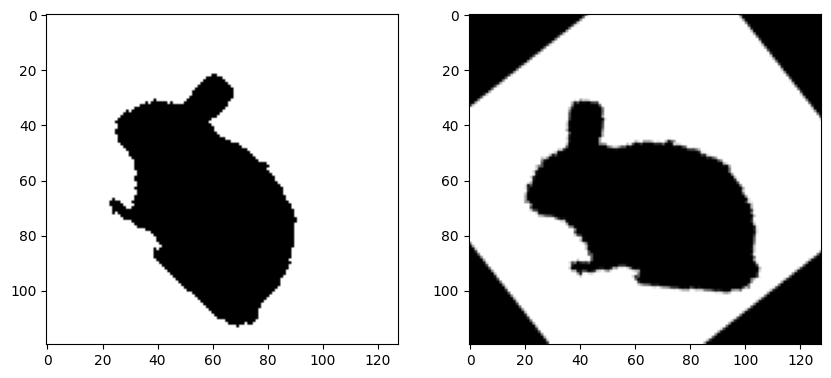

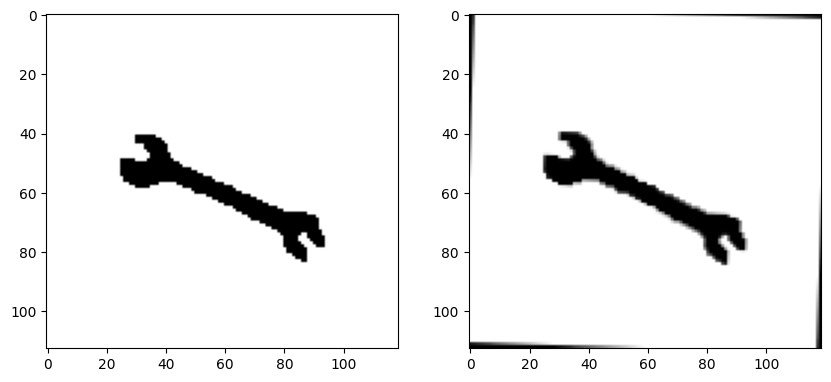

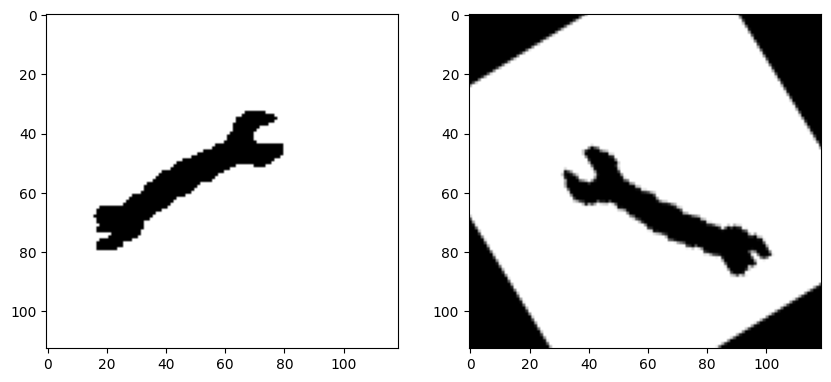

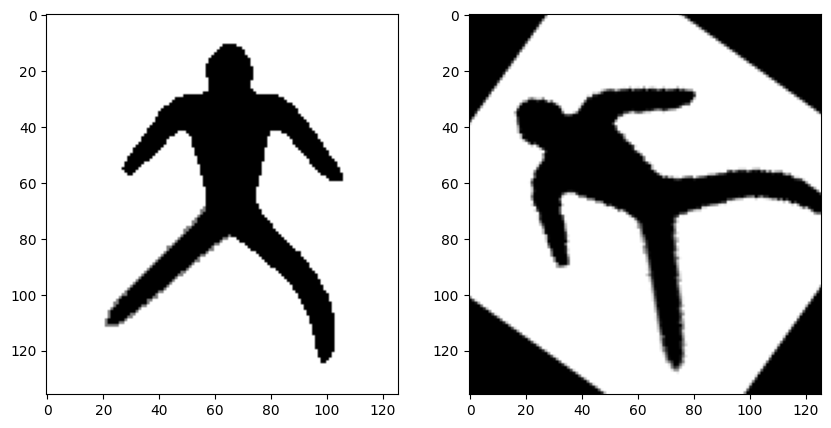

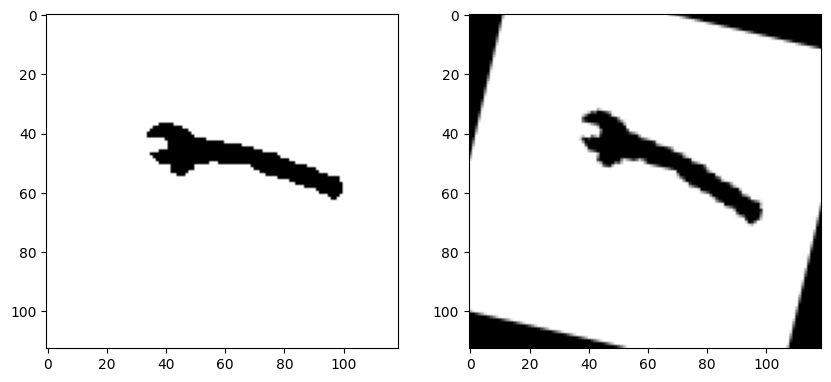

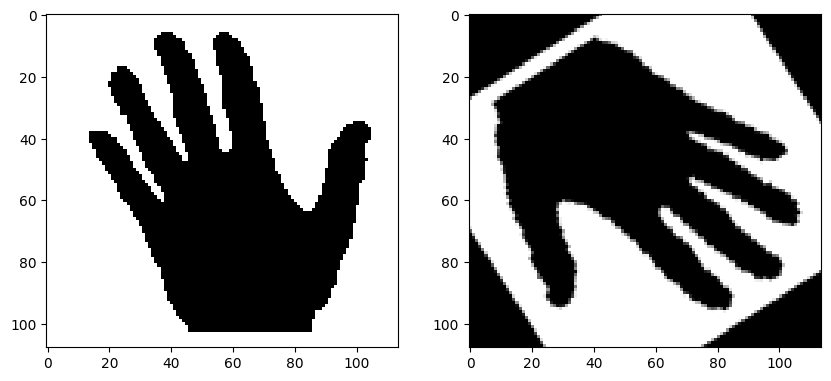

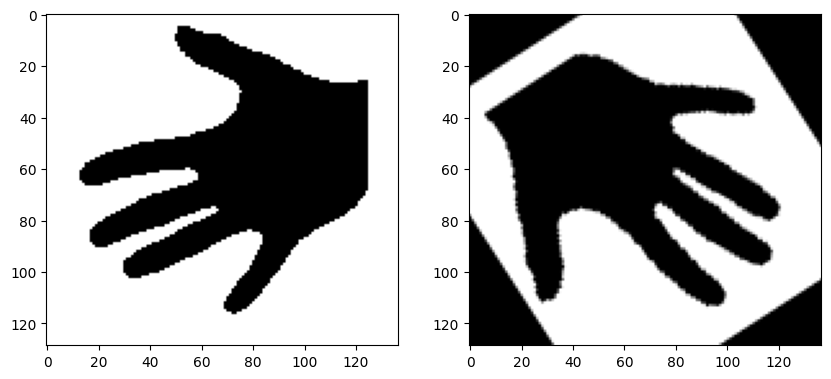

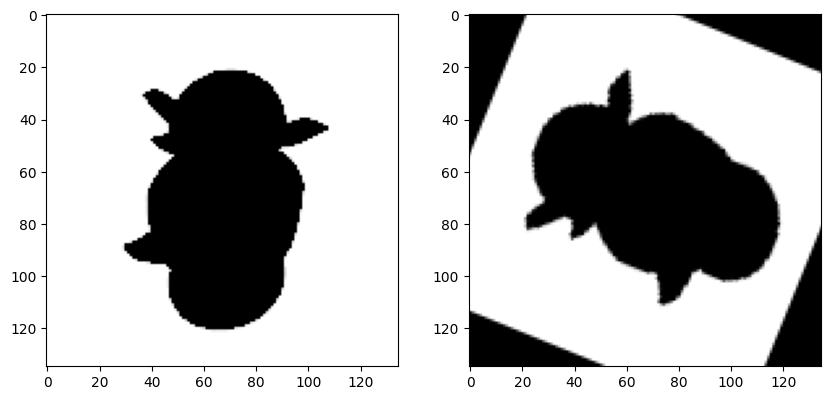

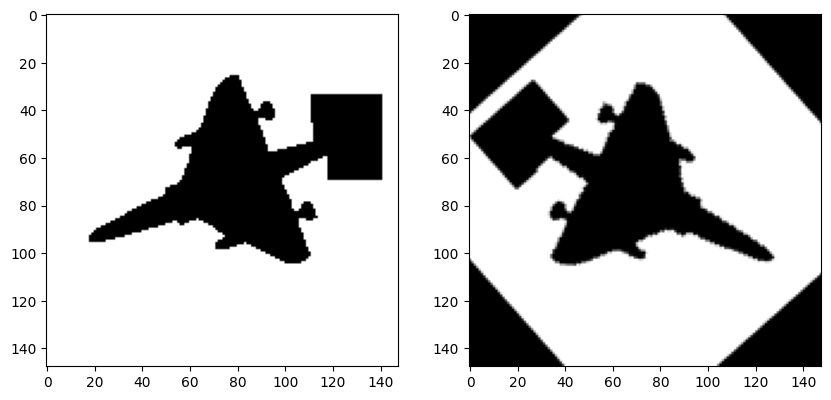

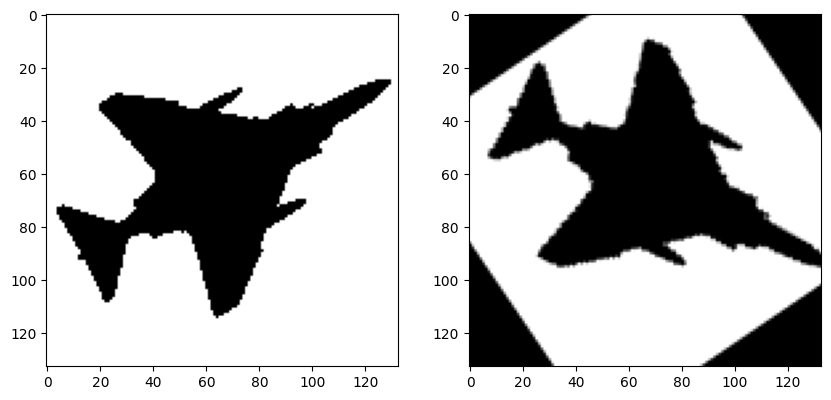

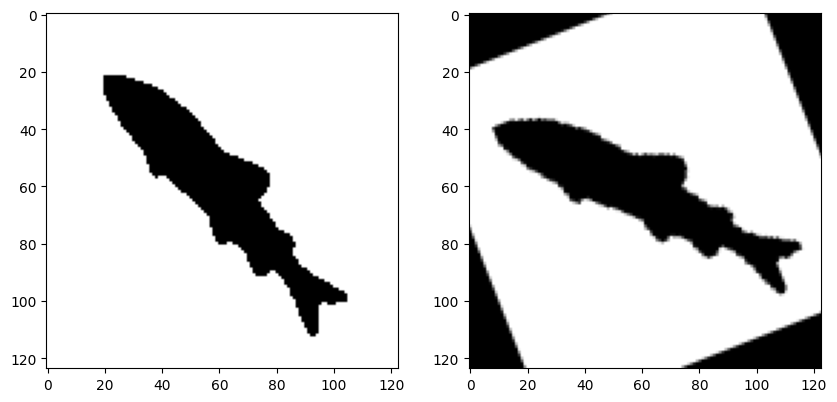

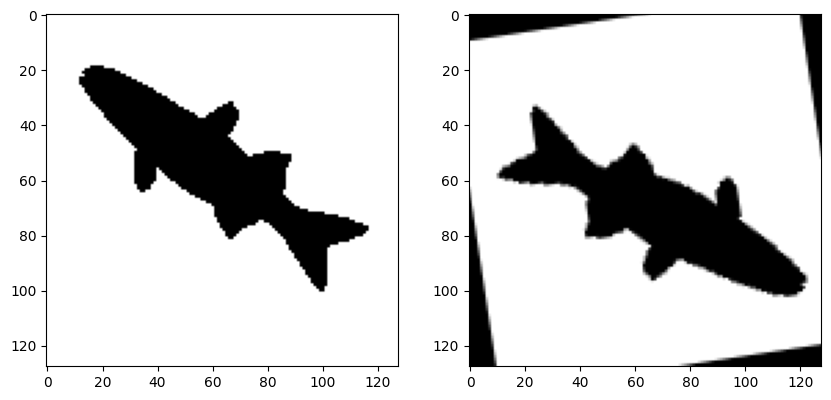

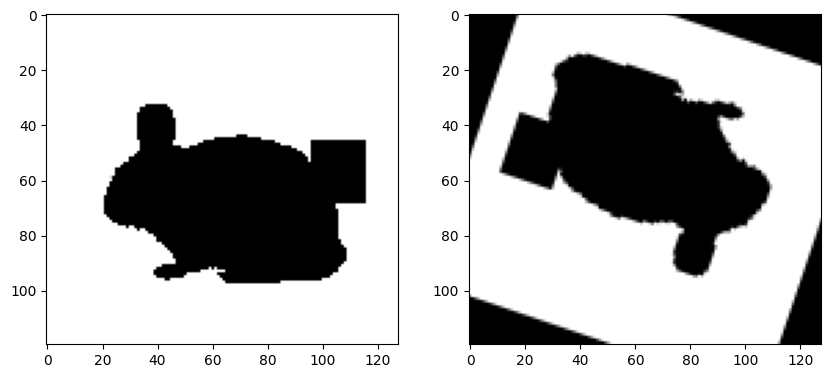

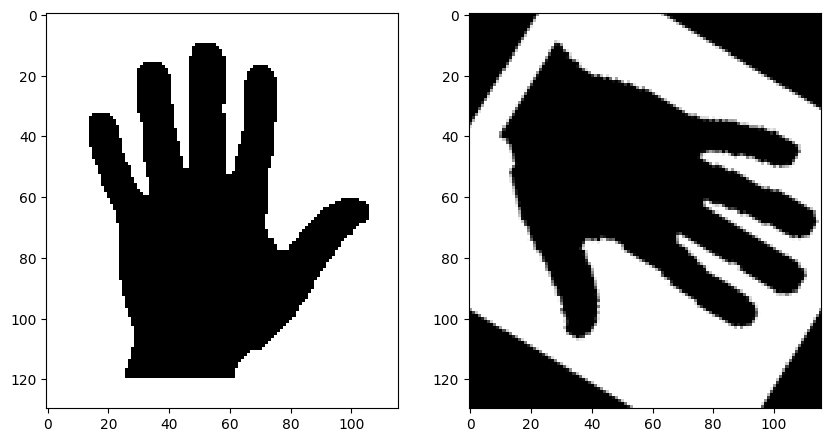

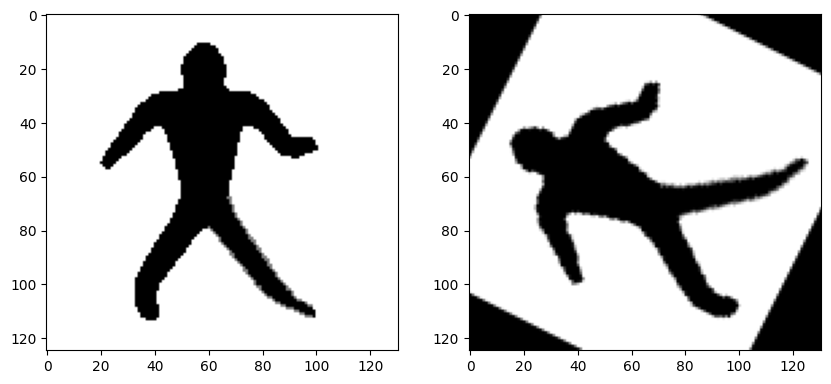

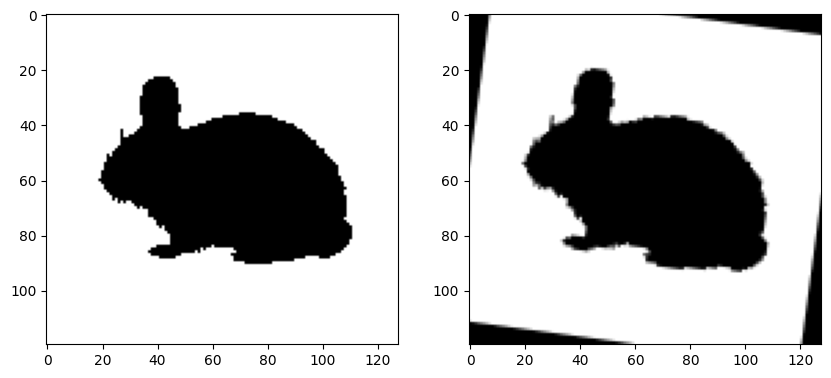

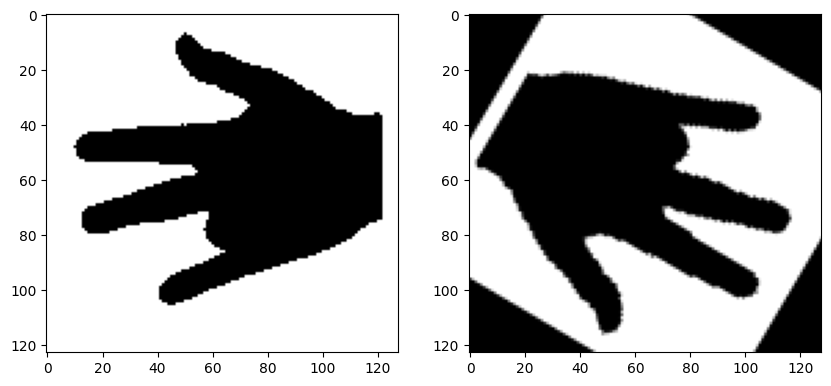

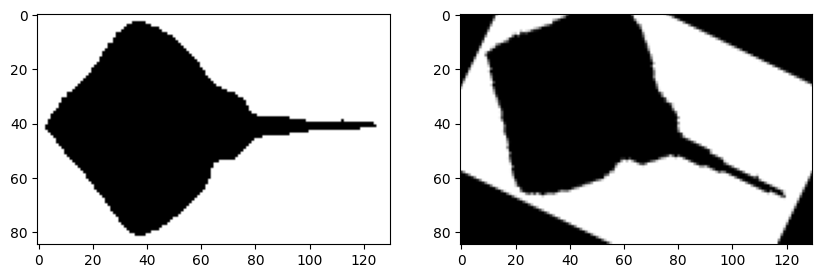

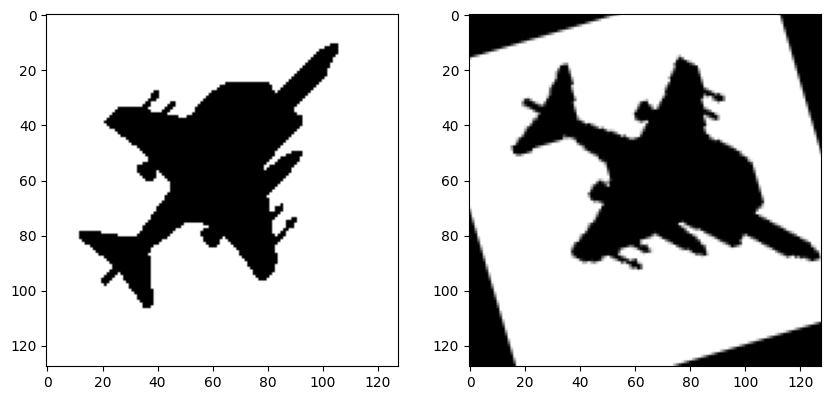

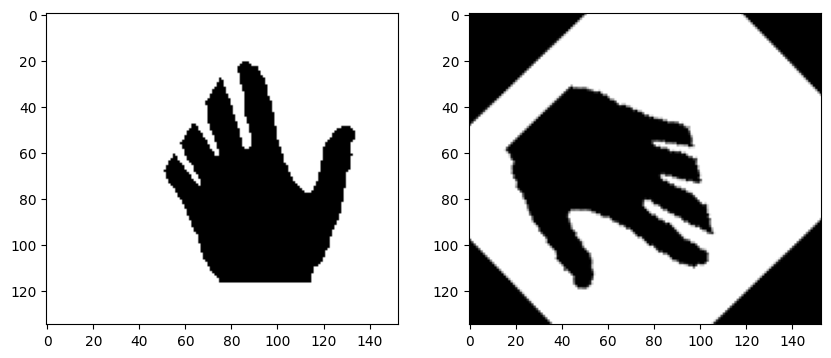

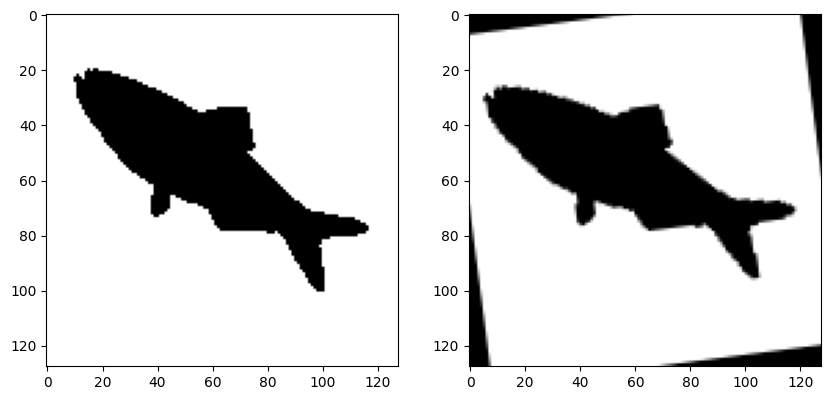

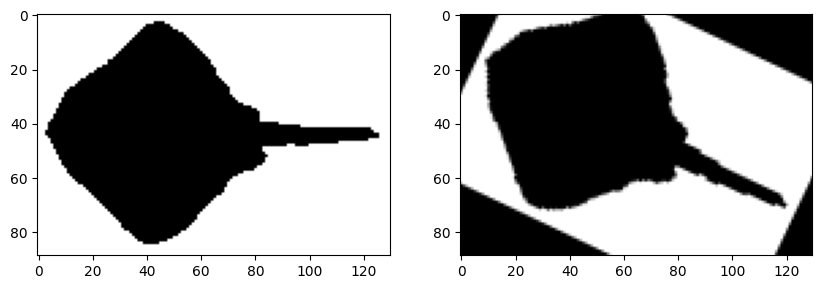

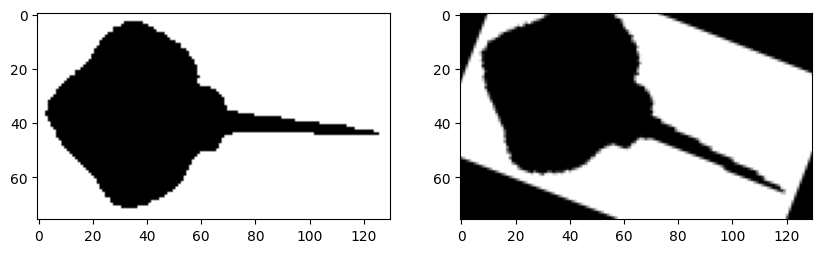

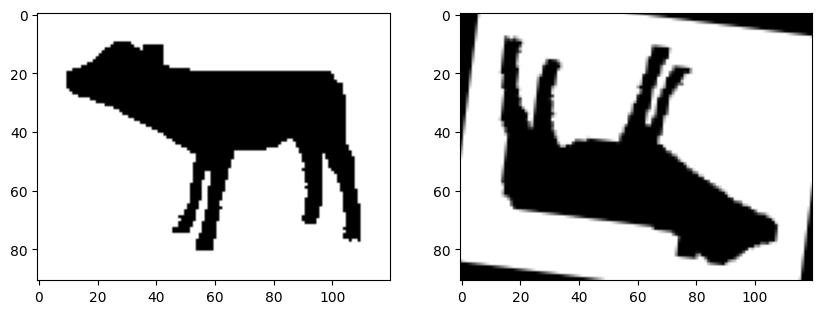

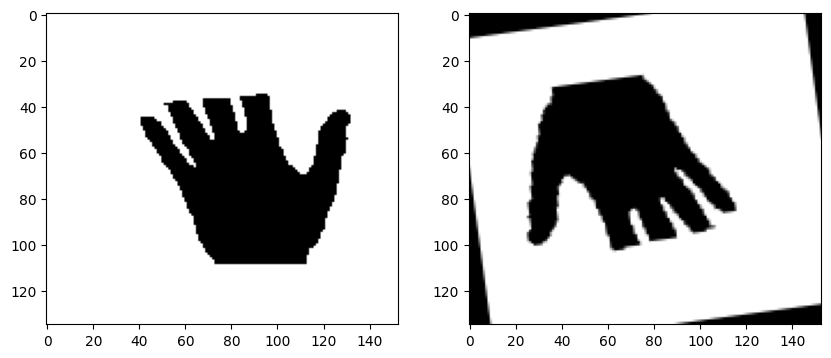

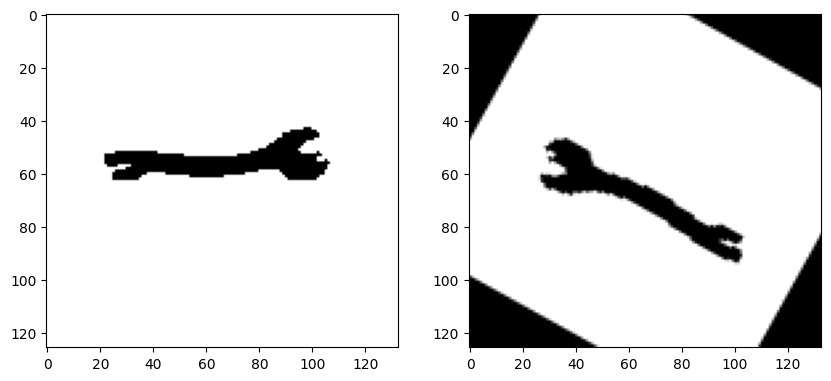

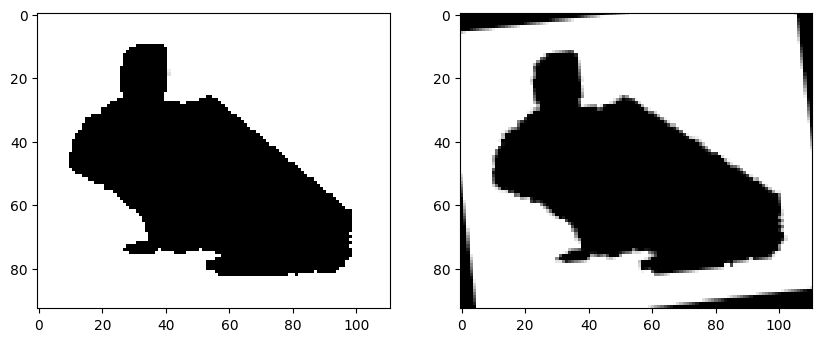

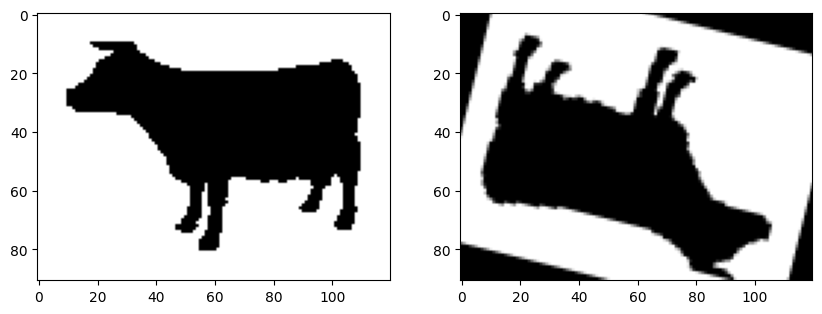

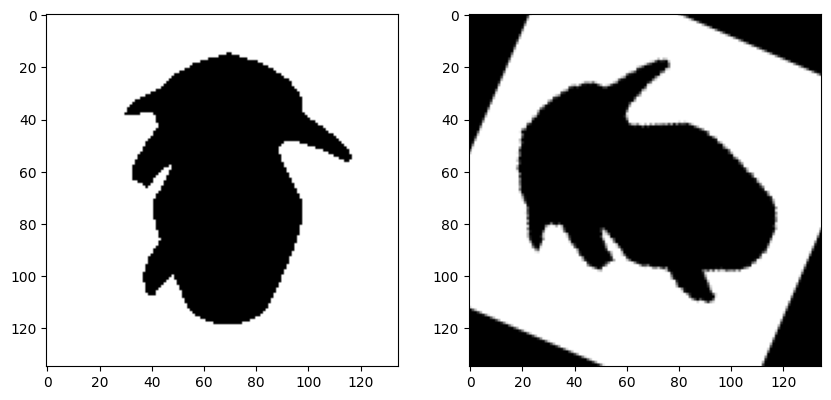

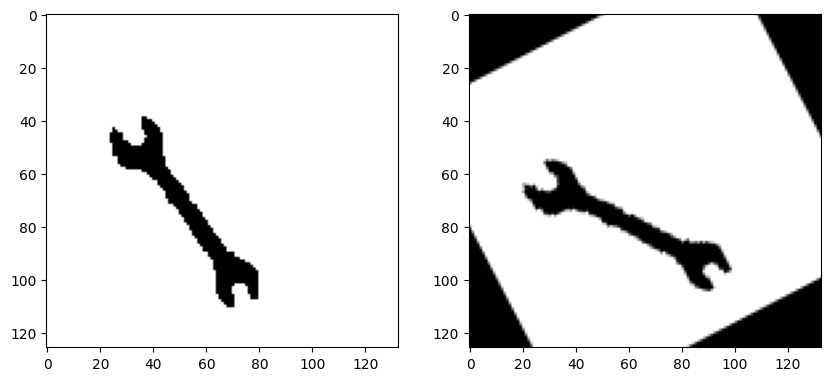

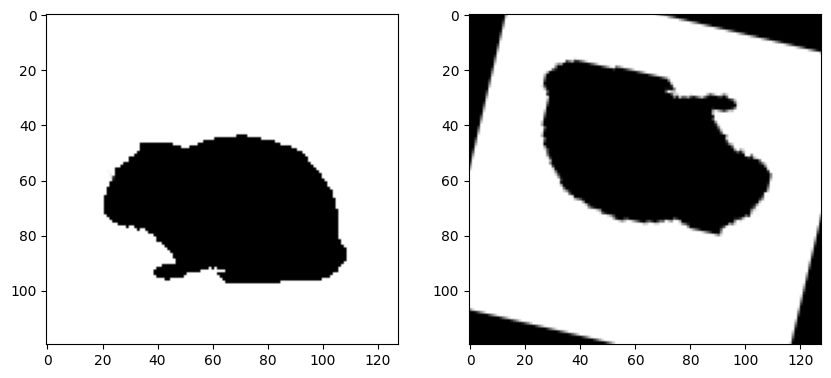

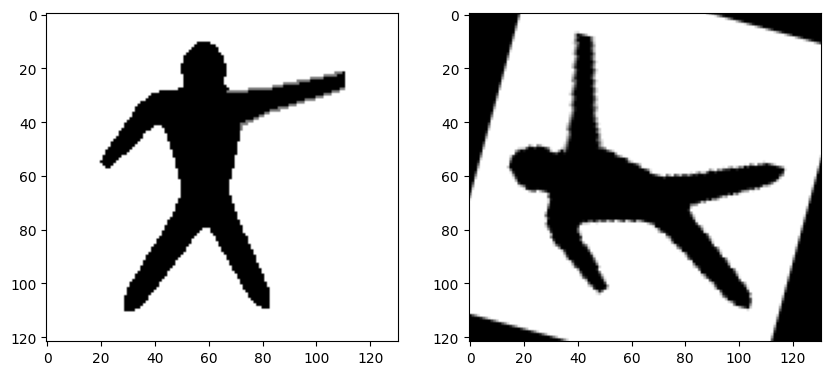

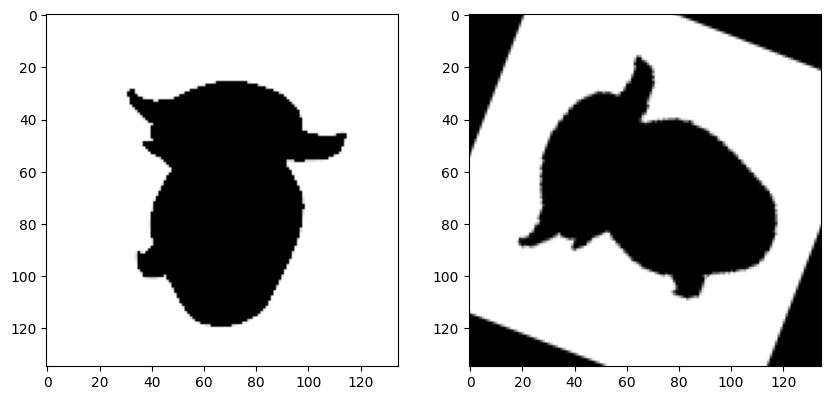

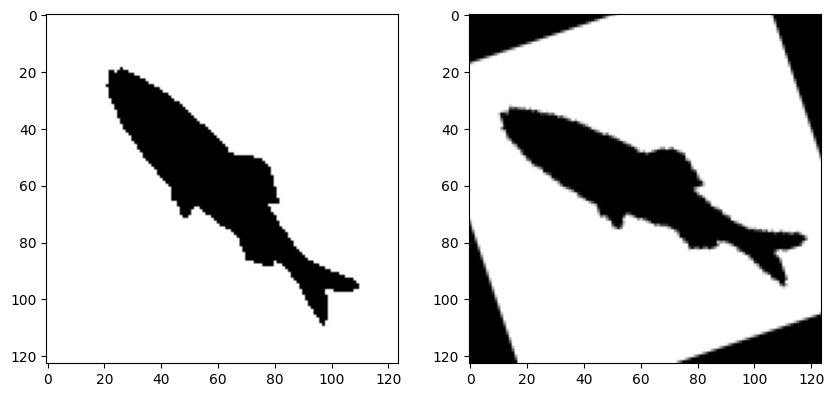

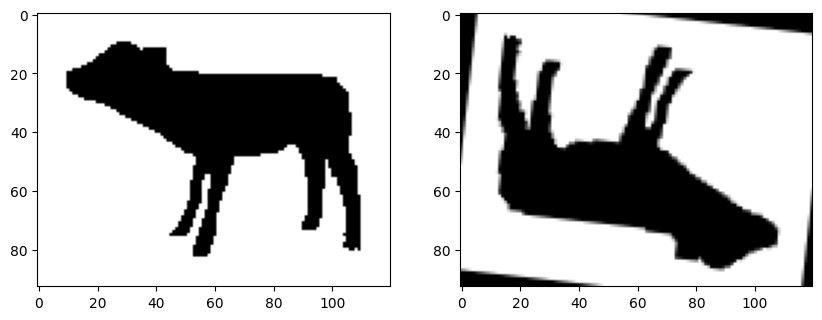

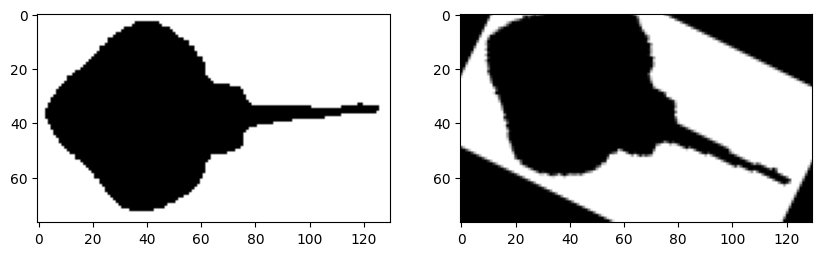

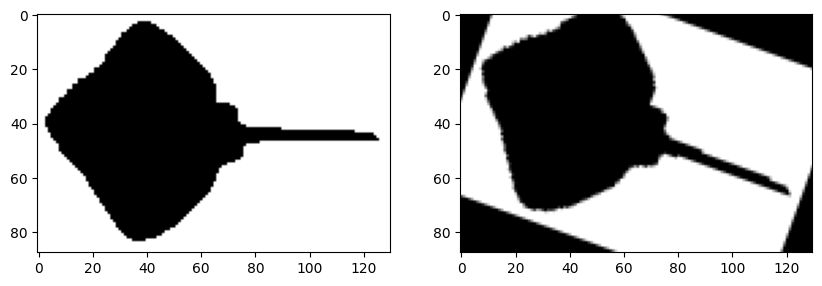

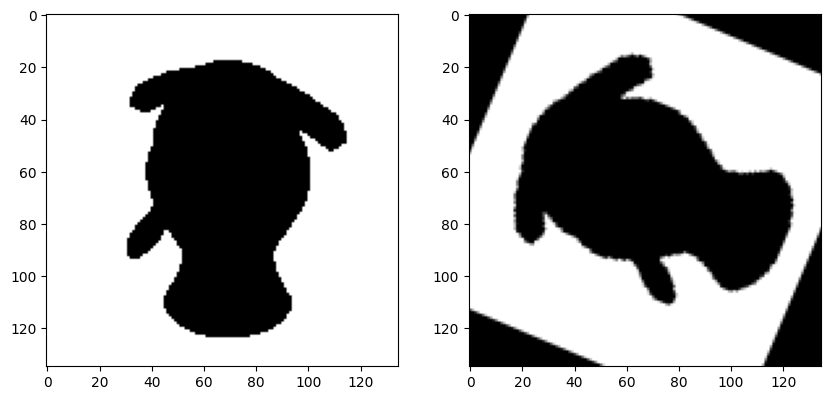

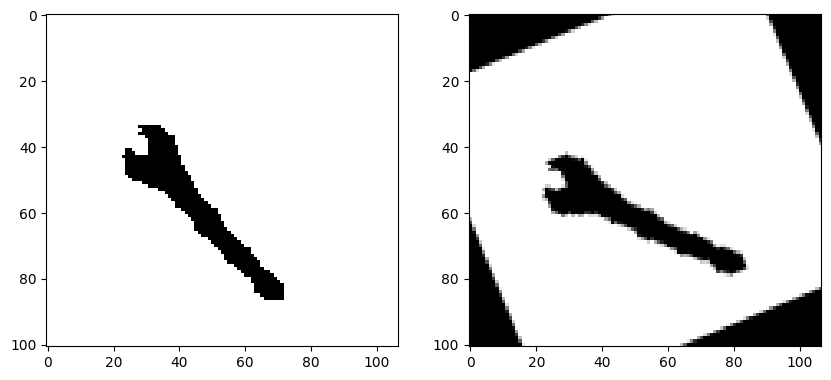

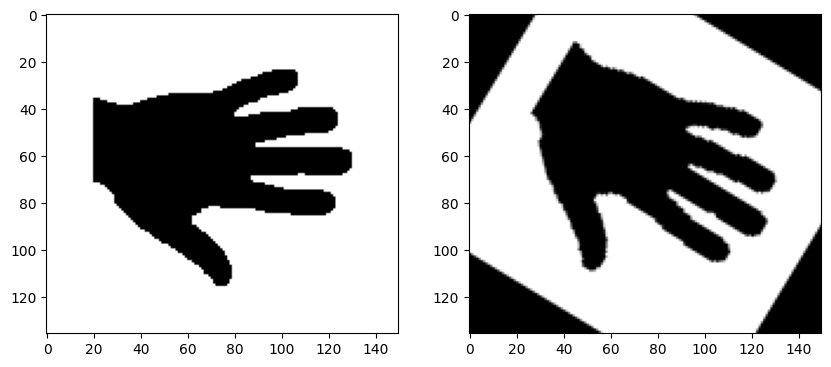

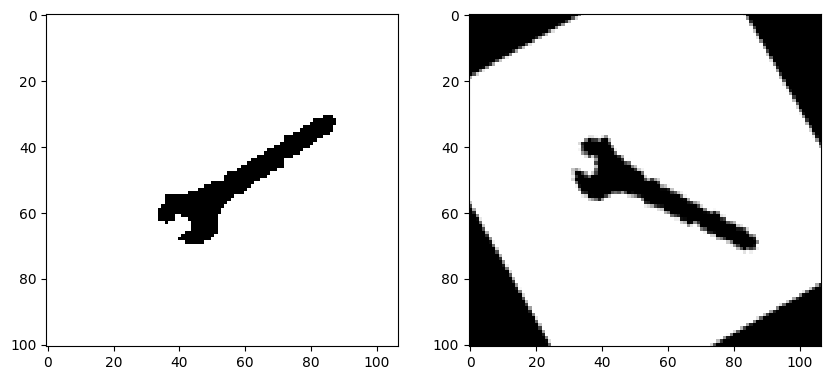

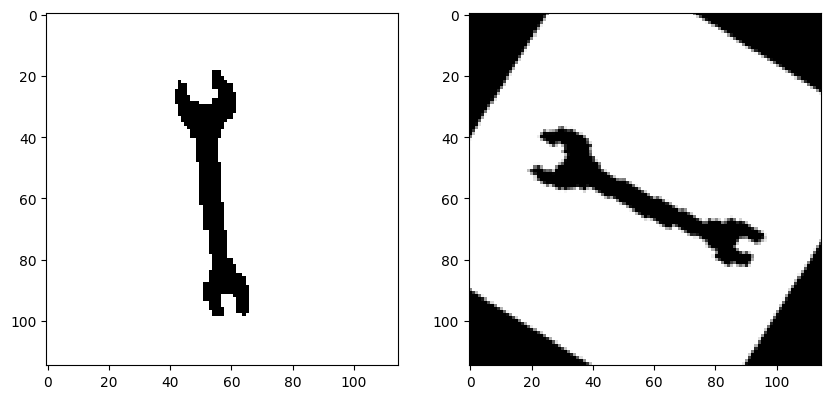

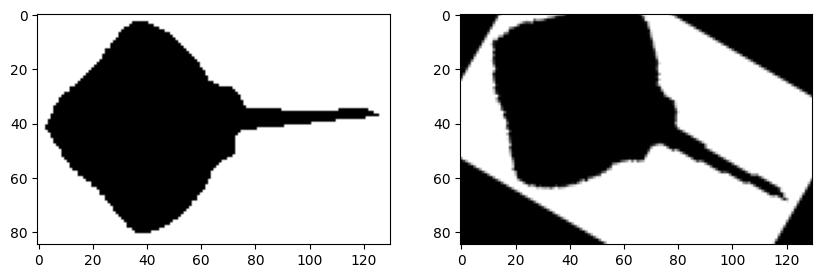

In [15]:
### Problem 4.1
template = cv2.imread('4/KIMIA Illustration/Templete_Input.png', cv2.IMREAD_GRAYSCALE)
path = './4/KIMIA-dataset/'
images = os.listdir(path)
shapes = []
for shape in images:
    shape_path = os.path.join(path, shape)
    shape = cv2.imread(shape_path, cv2.IMREAD_GRAYSCALE)
    shapes.append(shape)

aligned_shapes = []
template = np.argwhere(template == 1)
pca = PCA(n_components=2)
pca.fit(template)
eigenvectors = pca.components_
et = eigenvectors[0]
# et = get_eigen_vector(template)

for shape in shapes:
    ei = get_eigen_vector(shape)
    rotation_angle = get_rotation_angle(ei, et)
    rows, cols = shape.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    aligned_shape = cv2.warpAffine(shape, M, (cols, rows))
    aligned_shapes.append(aligned_shape)

for i, aligned_shape in enumerate(aligned_shapes):
    # cv2.imshow(f'aligned_shape_{i+1}.png', aligned_shape)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))  
    axes[0].imshow(shapes[i], cmap='gray')
    axes[1].imshow(aligned_shapes[i], cmap='gray')
    plt.show()